In [26]:
#!pip install kagglehub
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\bruno\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [3]:
df = pd.read_csv("C:/Users/bruno\Desktop/IronHack/Labs/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\bruno\AppData\Local\Temp\ipykernel_14352\1530123610.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:/Users/bruno\Desktop/IronHack/Labs/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv")


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
# Generating a crosstab for 'category' and 'isBestSeller'
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [9]:
serie_frecuency = crosstab_result[True] / crosstab_result[False]
serie_frecuency.sort_values(ascending=False)

category
Grocery                             0.061723
Smart Home Security & Lighting      0.061224
Health & Personal Care              0.061218
Mobile Phone Accessories            0.044355
Power & Hand Tools                  0.036634
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Length: 296, dtype: float64

In [10]:
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [11]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

<Axes: xlabel='category'>

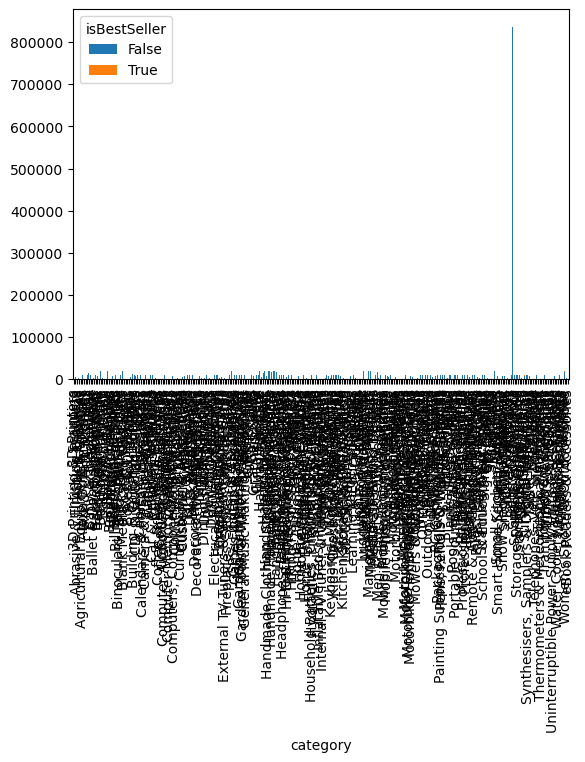

In [12]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True)

In [14]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
rango_inter_bal = round(q3 - q1, 2)
rango_inter_bal

36.0

In [ ]:
outliers_right = q3 + rango_inter_bal * 1.5
outliers_right

99.99000000000001

In [17]:
df_without_outliers = df[df['price'] < outliers_right]
df_without_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [24]:
#df_violin = df_without_outliers[df_without_outliers['category'] in df_without_outliers['category'].value_counts(ascending=False).head(20).index]
top_20_categories = df_without_outliers['category'].value_counts(ascending=False).head(20).index
df_violin = df_without_outliers[df_without_outliers['category'].isin(top_20_categories)]

df_violin

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


C:\Users\bruno\AppData\Local\Temp\ipykernel_14352\3916043201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_violin, x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

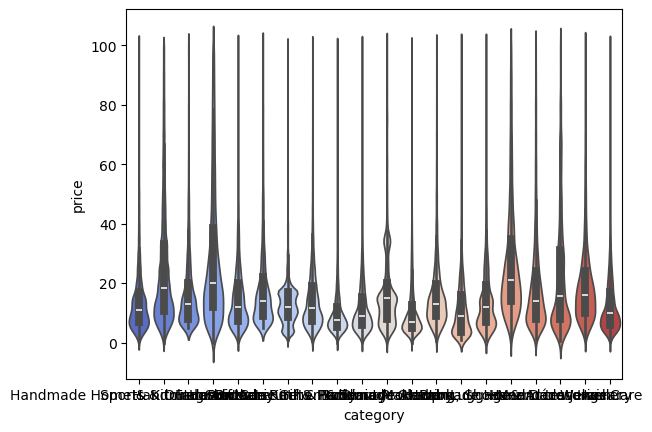

In [ ]:
# Plotting a violin plot to visualize the distribution of 'price' for each category, using the "coolwarm" color palette
sns.violinplot(data=df_violin, x='category', y='price', palette="coolwarm")

In [33]:
top_10_categories = df_without_outliers['category'].value_counts(ascending=False).head(10).index

df_price_mean = df_without_outliers[df_without_outliers['category'].isin(top_10_categories)]

df_price_mean = df_price_mean.groupby('category')['price'].mean().reset_index()
                
df_price_mean

,category,price
0,Bath & Body,14.678683
1,Beauty,12.523480
2,Birthday Gifts,18.600195
3,Hair Care,13.461408
4,"Handmade Clothing, Shoes & Accessories",12.958639
5,Handmade Gifts,17.395112
6,Make-up,10.612918
7,Manicure & Pedicure Products,10.231825
8,Skin Care,15.654722
9,Sports & Outdoors,25.172065


C:\Users\bruno\AppData\Local\Temp\ipykernel_14352\2441420905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_price_mean, x='category', y='price', palette="coolwarm", order=ordered_categories)


<Axes: xlabel='category', ylabel='price'>

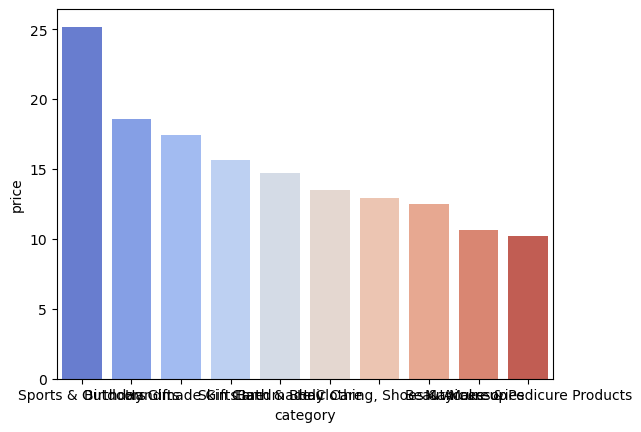

In [35]:
ordered_categories = df_price_mean.sort_values(by='price', ascending=False)['category']

# Plotting a bar plot to visualize the average 'price' for each category, using the "coolwarm" color palette
sns.barplot(data=df_price_mean, x='category', y='price', palette="coolwarm", order=ordered_categories)

C:\Users\bruno\AppData\Local\Temp\ipykernel_14352\863215614.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_stars, x='category', y='stars', palette="coolwarm")


<Axes: xlabel='category', ylabel='stars'>

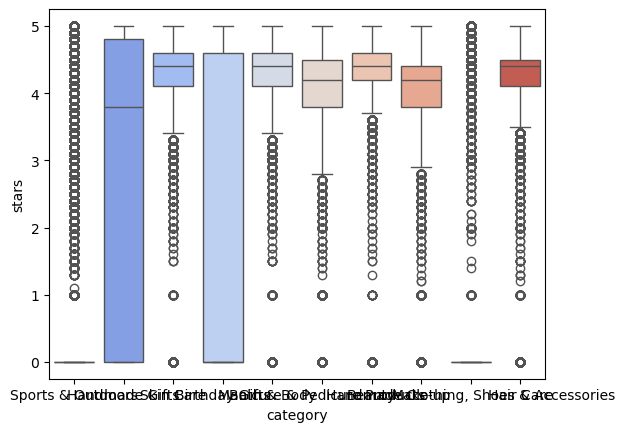

In [36]:
df_stars = df[df['category'].isin(top_10_categories)]


# Plotting a box plot to visualize the spread and outliers of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.boxplot(data=df_stars, x='category', y='stars', palette="coolwarm")

In [39]:
top_1_stars = df.groupby('category')['stars'].mean().sort_values(ascending=False).head(1)
top_1_stars

category
Luxury Food & Drink    4.54757
Name: stars, dtype: float64

In [40]:
# Calculating the Pearson correlation coefficient between 'price' and 'stars' columns
correlation = df['price'].corr(df['stars'])
correlation

-0.12490673262159059

In [41]:
# Calculating the Spearman rank correlation between 'price' and 'stars' 
correlation = df['price'].corr(df['stars'], method='spearman')
correlation

-0.13316425462401277

<Axes: xlabel='stars', ylabel='price'>

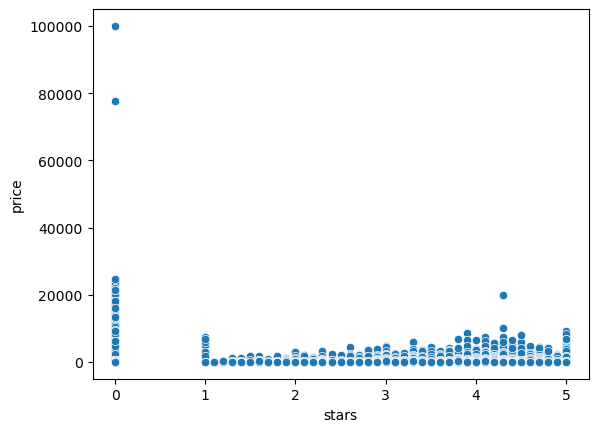

In [42]:
# Plotting a scatter plot to visualize the relationship between 'price' and 'stars'
sns.scatterplot(data=df, x='stars', y='price')

In [ ]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [50]:
df['uid'] = df['uid'].astype('str')
df['asin'] = df['asin'].astype('str')
df['stars'] = df['stars'].astype('float')
df['reviews'] = df['reviews'].astype('int')
df['price'] = df['price'].astype('float')

In [51]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
df_numerical = df.select_dtypes("number")
df_numerical

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0
...,...,...,...,...
2443646,0.0,0,22.34,0
2443647,0.0,0,97.99,0
2443648,0.0,0,52.99,0
2443649,4.3,404,79.99,0


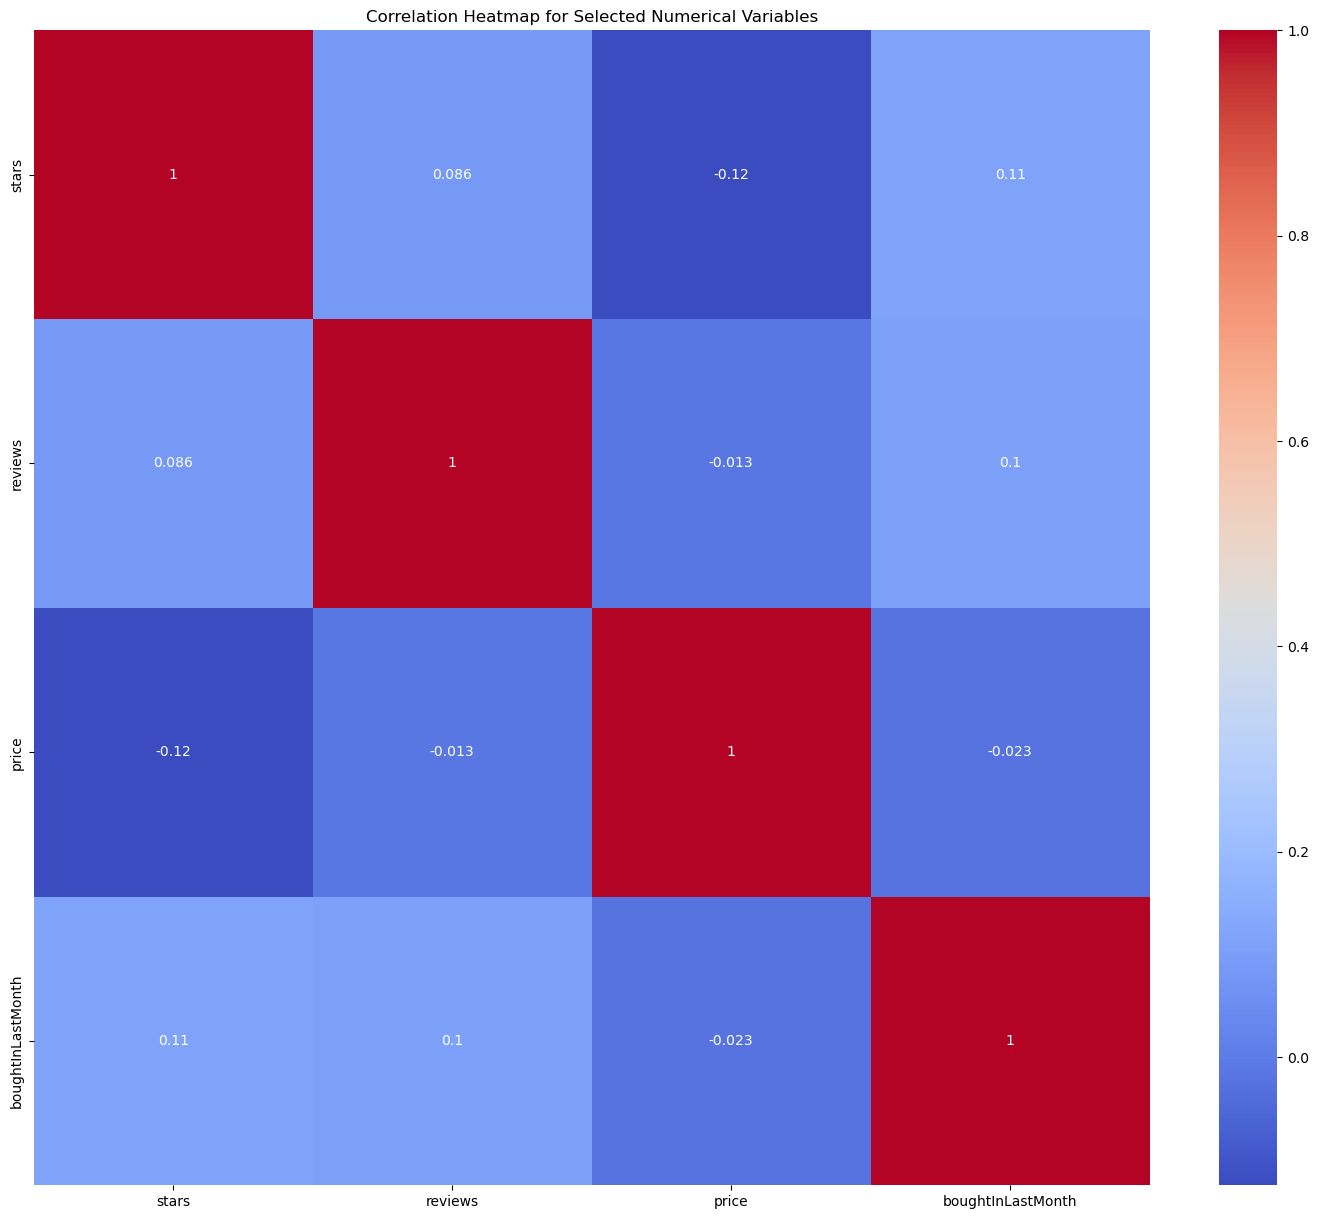

In [52]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

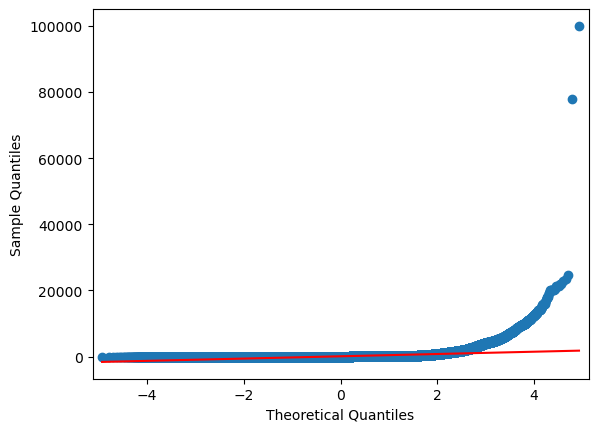

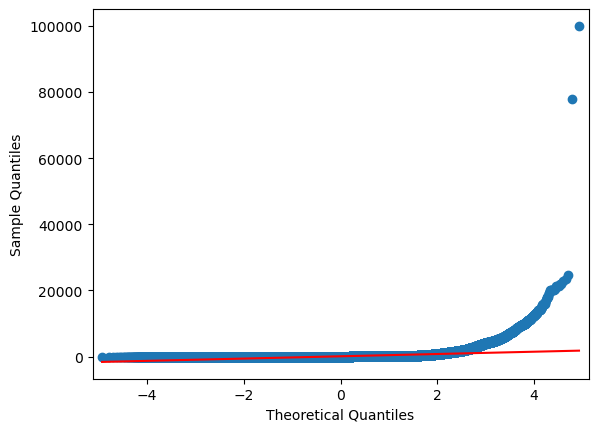

In [54]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'prices' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s')

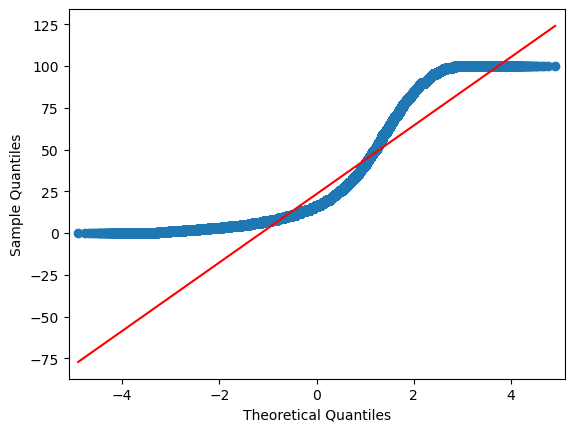

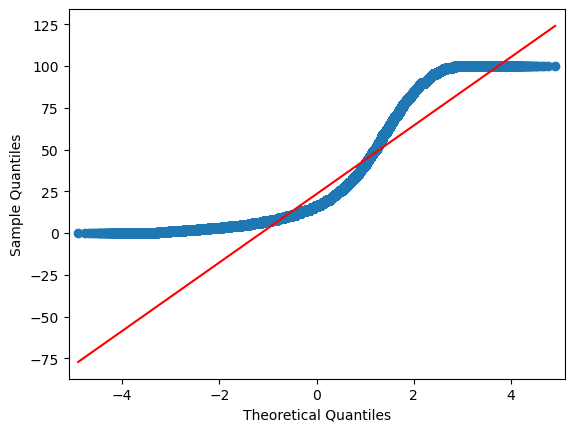

In [55]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df_without_outliers['price'], line='s')

The distribution of prices don't follow a normal distribution